In [2]:
# Import libraries
import numpy as np
from scipy.stats import norm
from scipy.spatial import distance

import matplotlib
#making default font bigger
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)
import matplotlib.pyplot as plt

# I. Probability Density Function

1.1. Plot the normal distribution $p(x) = \mathcal{N}(x;0,1)$

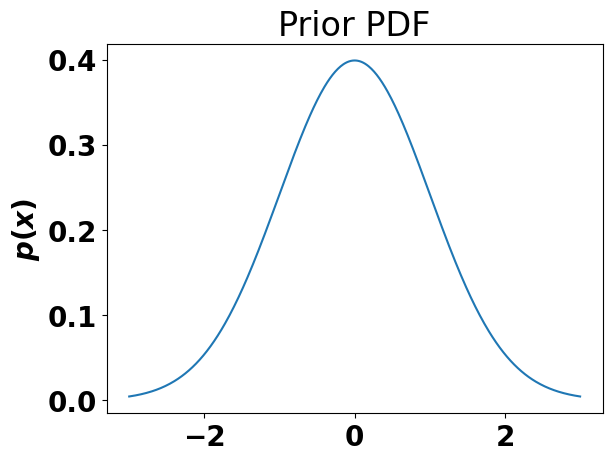

In [22]:
# Your code here
x = ...
prior_pdf = ...

plt.plot(x, prior_pdf)

plt.title('Prior PDF')
plt.ylabel('$p(x)$')
plt.show()

1.2 Plot the same distribution $p(x) = \mathcal{N}(x;0,1)$, but this time by using only the exponent function $p(x) = \eta e^{-0.5 x^2}$. This will require you to normalize the PDF.

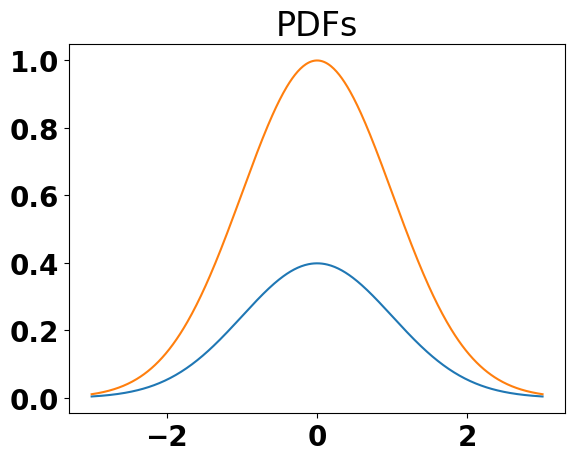

In [8]:
# Your code in here
numerical_pdf = ...

plt.plot(x, prior_pdf, label='$p(x)$')
plt.plot(x, numerical_pdf, label='numerical')
plt.title('PDFs')
plt.show()

# II. Probability mass 
_Imagine that your shouting robot Dartsy1D tryes to hit the target - the centre of a one-dimensional interval.  
Find the probability to hit segment defined by the iso-contour value 1 ($\pm \sigma$). Dartsy1D's shooting accuracy is normally distributed.  
Find the same meausre for $\pm 2 \sigma$ and $\pm 3 \sigma$._ 

![](Dartsy1D.png)

This task is to theoretically find the portion of data within 1/2/3-Sigma interval (or iso-contour).  
For simplicity consider standard one-dimensional Normallly distributed accuracy for this task.  
You may need to recall cumulative density function and use `norm.cdf`

In [13]:
def portion_standard(n_sigmas):
    '''
    Probability to meet a sample value within 1-, 2-, 3-Sigma interval of std. normal distribution
    
    Parameters
    ----------
    n_sigmas : number of Sigma intervals from the mean
    
    Returns
    -------
    port : probability
    '''
    assert n_sigmas == 1 or n_sigmas == 2 or n_sigmas == 3, 'Choose 1, 2 or 3'
    
    # Your code below
    port = ...
    
    return port

In [ ]:
portion_standard(3)

# III. Mahalanobis distance
In this task we compare euclidian and mahalanobis distances in 2D.  
For that we measure the distances to some test point from mean values of two Gaussian distributions

In [18]:
# Distributions
mean1 = [-10,0]
cov1 = np.array([
    [1,0],
    [0,1]])

mean2 = [10,0]
cov2 = np.array([
    [6,0],
    [0,6]])

## 1. Sample two normal 2D-distributions
You may need to use `np.random.multivariate_normal(...)`

In [29]:
n = 1000
# Your code below
cloud1 = ... 
cloud2 = ...

cloud1.shape # Should be (n, 2)

(1000, 2)

In [30]:
# Test point
test_point = [-5,5]

In [31]:
def plot_scene(cloud1, cloud2, mean1, mean2, test_point):
    plt.figure(figsize=(10,7))
    plt.scatter(cloud1[:,0], cloud1[:,1], marker='.', c='g', label='Cloud 1')
    plt.scatter(cloud2[:,0], cloud2[:,1], marker='.', c='b', label='Cloud 2')
    plt.scatter(mean1[0], mean1[1], marker='o', c='y', s=200, label='Mean 1')
    plt.scatter(mean2[0], mean2[1], marker='o', c='r', s=200, label='Mean 2')
    plt.scatter(test_point[0], test_point[1], marker='x', c='k', s=200, label='Test point')
    plt.plot([test_point[0], mean1[0]], [test_point[1], mean1[1]], '--', color='y')
    plt.plot([test_point[0], mean2[0]], [test_point[1], mean2[1]], '--', color='r')
    plt.legend()
    plt.axis('equal')
    plt.grid()

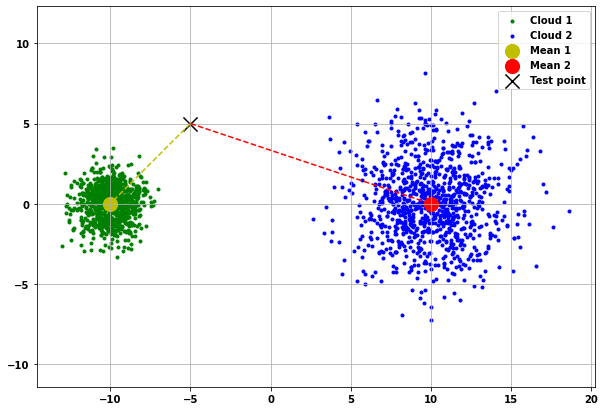

In [32]:
plot_scene(cloud1, cloud2, mean1, mean2, test_point)

## 2. Answer the question: What point cloud mean value is closer to test point?  
Provide the answer for both, euclidean and mahalanobis distance measure.  
You may need to use SciPy `distance` module.

In [19]:
# Eucledian distance (test_point, mean1)
# Your code below


In [20]:
# Eucledian distance (test_point, mean2)
# Your code below


In [23]:
# Mahalanobis distance (test_point, mean1)
# Your code below


In [24]:
# Mahalanobis distance (test_point, mean2)
# Your code below


# IV. Transformations of Gaussian



## 1. Linear transformation

If normal random variable $\xi \sim \mathcal{N}(\mu, \Sigma)$, then their linear transformation will also be a normal random variable:

$$
\hat{\xi} = A \xi + b,\\
\hat{\xi} \sim \mathcal{N}(A\mu + b, A \Sigma A^T)
$$

Let's generate new gaussian $\xi \sim \mathcal{N}(\mu, \Sigma)$, where

$$
\mu = [0,0]^T\\
\Sigma = 
\left[
\begin{array}{cc}
    1&0 \\
    0&1 \\
\end{array}
\right]
$$

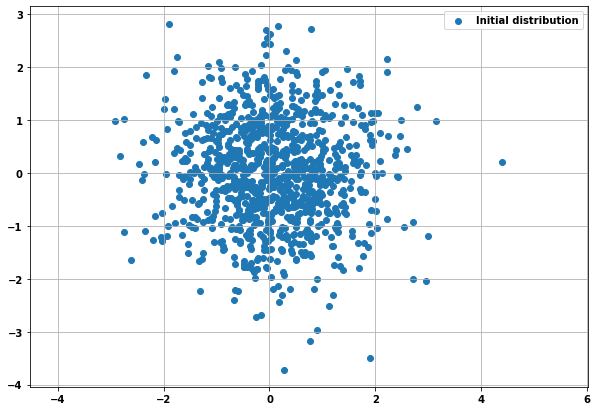

In [37]:
# number of samples
n = 1000

## new mean and covariance here
mean = np.array([0,0])

cov = np.array([[1,0],
                [0,1]])

# generate point cloud
cloud = ...

# plot scatterplot of the initial cloud
plt.figure(figsize=(10,7))
plt.scatter(cloud[:,0], cloud[:,1],label='Initial distribution')
plt.axis('equal')
plt.legend()
plt.grid()

Let's iteratively apply affine transformation and see how the initial cloud will propagate. Let's use the following:

$$
A =
\left[
\begin{array}{cc}
1.5 & 1 \\
0 & 1.7\\
\end{array}
\right]\\
b = \left[
\begin{array}{c}
7\\
0\\
\end{array}
\right]\\
$$

In [25]:
# define affine tranform x' = Ax + b here
A = ...

b = ...

def linear_transform(cloud):
    result = ...
    return result

**Plot initial distribution and transformed distribution:**

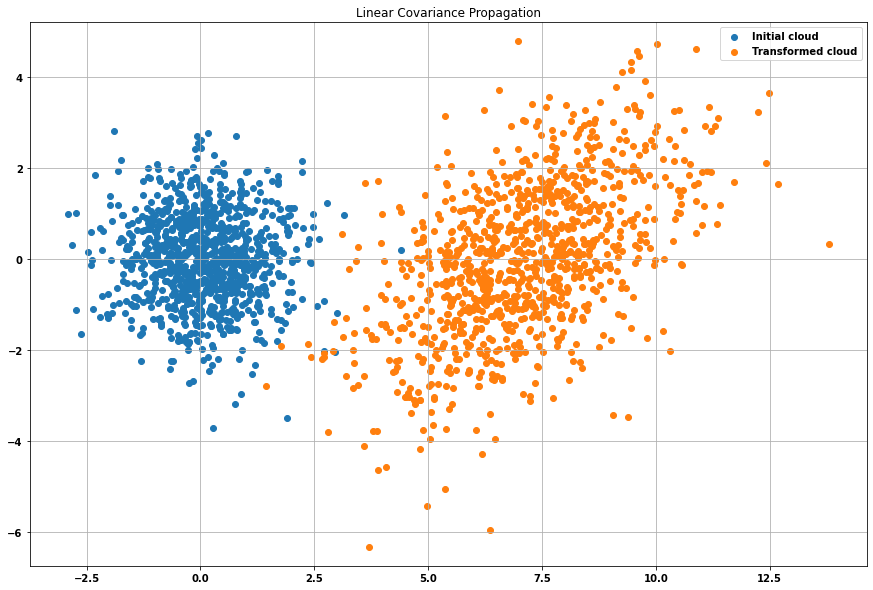

In [39]:
# put code here
# ....
propagated_cloud = linear_transform(cloud)

plt.figure(figsize=(15,10))
plt.title("Linear Covariance Propagation")
plt.scatter(cloud[:,0], cloud[:,1], label='Initial cloud')
plt.scatter(propagated_cloud[:,0],propagated_cloud[:,1], label='Transformed cloud')
plt.legend()
plt.axis('equal')
plt.grid()

Let's use analytical expression for mean and covariance propagation for linear case:

$$
\hat{\mu} = A \mu + b\\
\hat{\Sigma} = A\Sigma A^T
$$

In [40]:
# using analytical expressions propagate mean and covariance once
# put your code here
# ...
print("mean = ", ...)
print("covariance = \n", ...)

mean =  [[7. 0.]]
covariance = 
 [[3.25 1.7 ]
 [1.7  2.89]]


In [44]:
# calculate sample mean and covariance for propagated cloud
# put your code here
print('Sample mean = ', ... )
print('Sample covariance = ', ... )

Sample mean =  [ 7.09076415 -0.00822959]
Sample covariance =  [[3.10536489 1.59596189]
 [1.59596189 2.82802272]]


In [42]:
# calculate and print errors (L2-norm) between sample and analytical mean and covariace
# put code here
print('L2 error for mean = ', ...)
print('L2 error for covariance = ', ...)

L2 error for mean =  0.09113647354165548
L2 error for covariance =  0.21542598899260146
